## Get migration history reconstructions from Gundem et. al. neuroblastoma data (driver genes from WES)

### Setup

In [4]:
import sys
import os
import seaborn as sns
import pandas as pd
import torch
import matplotlib.pyplot as plt
from src.lib import vertex_labeling
from src.util import data_extraction_util as data_util
from src.util import pairtree_data_extraction_util as pt_util
from src.util import vertex_labeling_util as vert_util
from src.util import plotting_util as plot_util

REPO_DIR = os.path.join(os.getcwd(), "../../")
os.chdir(REPO_DIR)

plt.rcParams['figure.figsize'] = [3, 3]

GUNDEM_DATA_DIR = os.path.join(repo_dir, 'src/data/gundem_neuroblastoma_2023/patient_driver_genes')
ORCHARD_TREES_DIR = os.path.join(GUNDEM_DATA_DIR, 'orchard_trees')
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"] + sns.color_palette("Paired").as_hex()


### Function to process tree/vaf inputs and run metient

In [5]:
def find_labeling(ref_var_fn, orchard_results_fn, custom_colors, primary_site, patient_name):    
    ref_matrix, var_matrix, unique_sites, idx_to_cluster_label = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    data = pt_util.get_adj_matrices_from_pairtree_results(orchard_results_fn)
    if len(data) >= 3: # Look at top 3 trees
        print(f"Using top 3 of {len(data)} inferred trees")
        data = data[:3 if len(data) >2 else len(data)]
    
    for i, (T, llh) in enumerate(data):
        print(f"TREE {i}, llh {llh}")
        print(T)
        if not vert_util.is_tree(T):
            print("Invalid tree was provided, skipping: \n", T)
            continue
        idx_to_cluster_label = {k:(" ").join(v.split('_')[0:2]) for k,v in idx_to_cluster_label.items()}
        print(f"Anatomical sites: {unique_sites}")   
        primary_idx = unique_sites.index(primary_site)
        p = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=3.0, comig=2.0, seed_site=1.0, reg=2.0, gen_dist=0.0)
        print_config = plot_util.PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=1)
        vertex_labeling.get_migration_history(T, ref_matrix, var_matrix, unique_sites, p, idx_to_cluster_label, weights,
                                              print_config, os.path.join(GUNDEM_DATA_DIR, "metient_outputs"), patient_name,
                                              custom_colors=custom_colors)
        

### Run migration history analysis for all patients 

11 patients, {'H132388_clustered', 'H118706_clustered', 'H133120_clustered', 'H132374_clustered', 'H103207_clustered', 'H132387_clustered', 'H134819_clustered', 'H116984_clustered', 'H134821_clustered', 'H116991_clustered', 'H133121_clustered'}
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H132388_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
*Multiple primary samples, running metient once for each possible primary*
Primary site: retroperitoneal - D 0
TREE 0, llh -16.16084398877423
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['retroperitoneal - D 0', 'retroperitoneal - D 1', 'right adrenal - TR 2', 'left axillary lymph node - R 3']


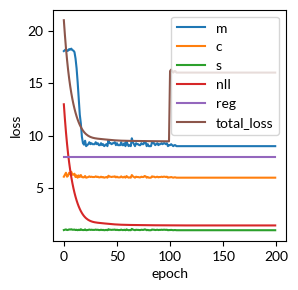

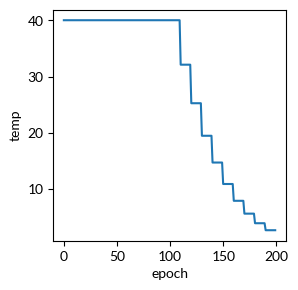

Time elapsed: 18.978497


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H132388_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

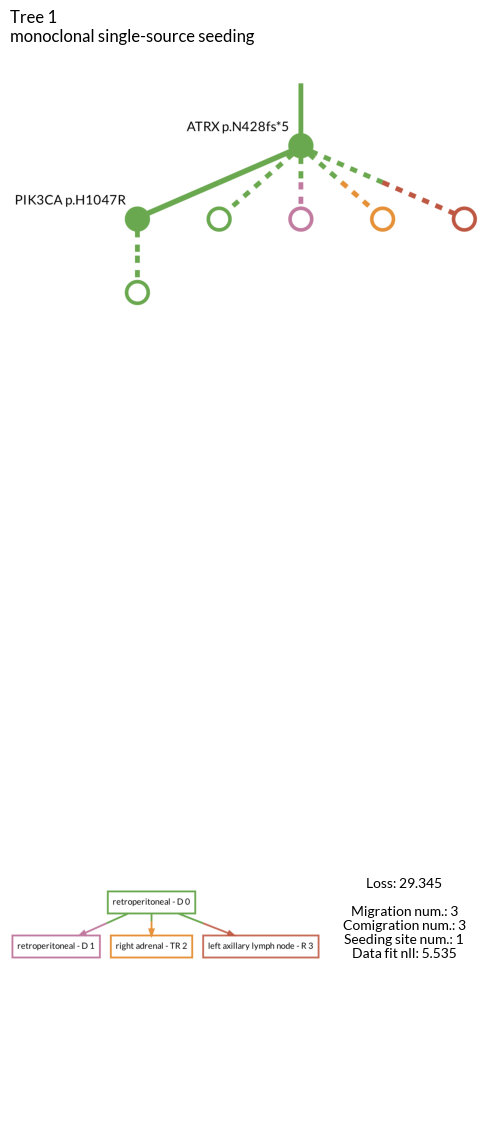

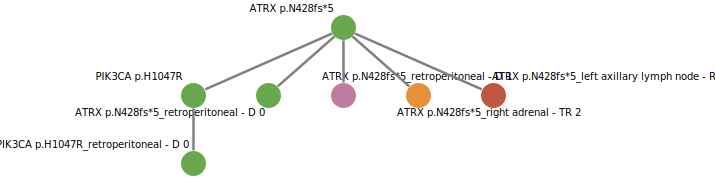

Primary site: retroperitoneal - D 1
TREE 0, llh -16.16084398877423
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['retroperitoneal - D 0', 'retroperitoneal - D 1', 'right adrenal - TR 2', 'left axillary lymph node - R 3']


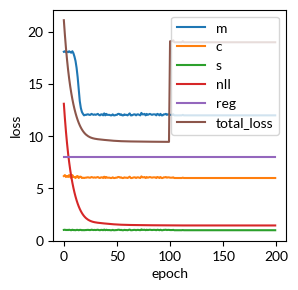

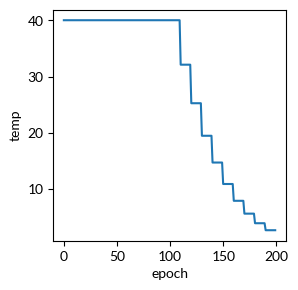

Time elapsed: 19.466734


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H132388_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

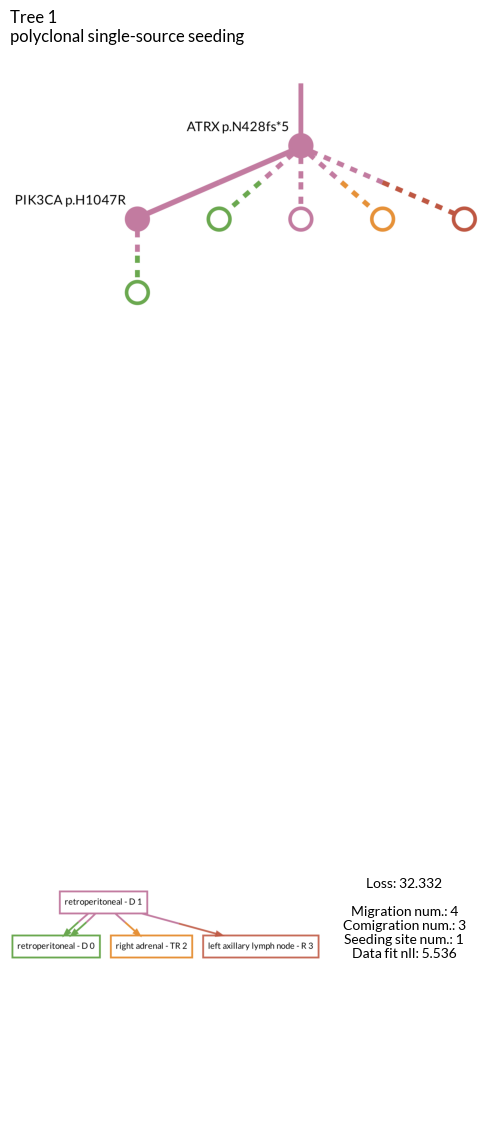

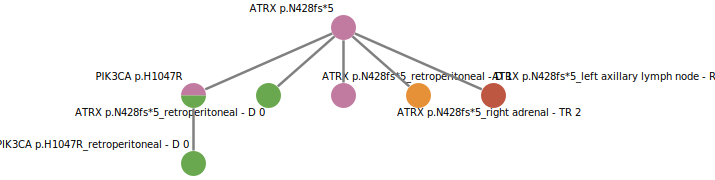

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H118706_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: right adrenal | 10 1D - D
TREE 0, llh -214.11077210232855
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['right adrenal | 10 1D - D', 'right lung lower lobe | 3 17 1D - FR', 'paraaortic lymph node | 22 1D - FR', 'left lung lower lobe | 23 1D - FR', 'liver anterior dome | 24 3D - FR', 'liver | right seg 7 2 26 1D - FR', 'liver | 5 1 1D - FR', 'liver | 2 7 2D - FR', 'liver | 3 9 3D - FR', 'liver | 7 14 13D - FR', 'liver | 7 14 3D - FR', 'liver | 7 14 7D - FR', 'liver | 4 11 2D - FR', 'liver | 5 12 2D - FR', 'liver | 6 13 1D - FR', 'right lung lower lobe | 1 15 1D - FR', 'liver - D']


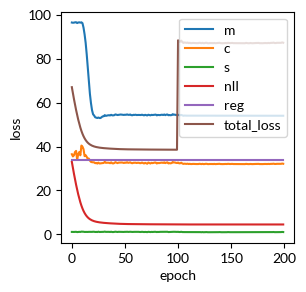

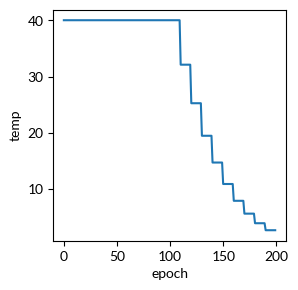

Time elapsed: 20.29368


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H118706_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

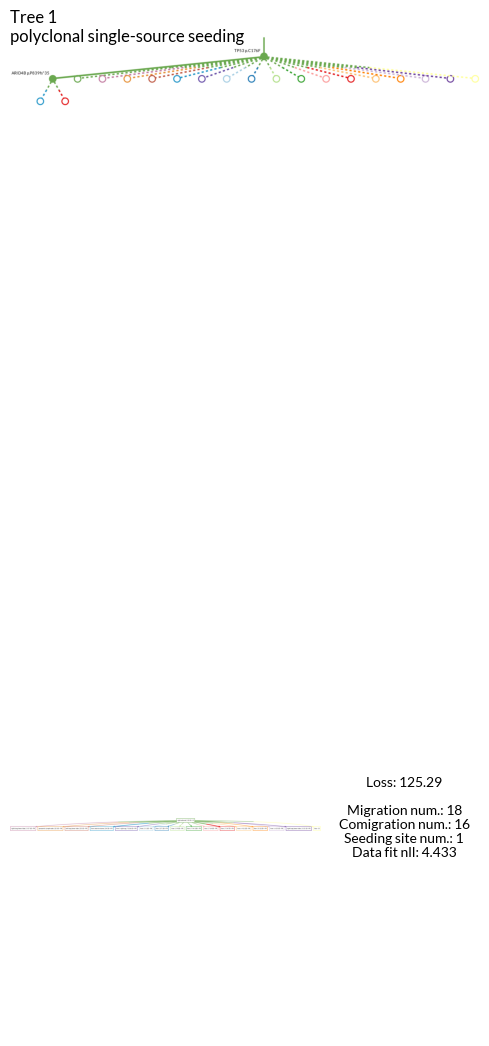

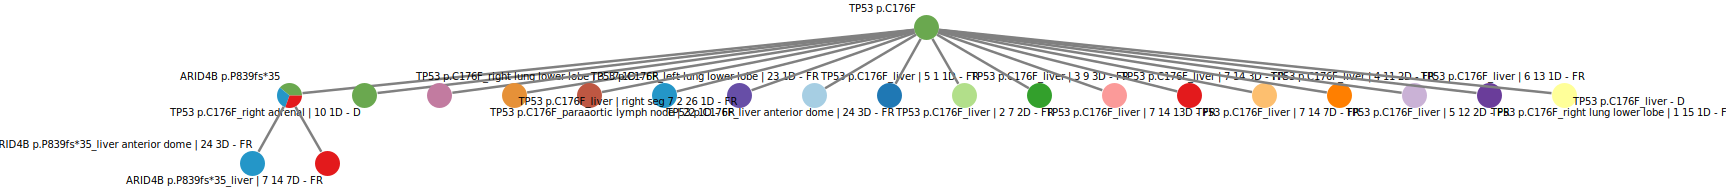

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H133120_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: right retroperitoneal - TR
TREE 0, llh -11.875208307991905
tensor([[0.]])
Invalid tree was provided, skipping: 
 tensor([[0.]])
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H132374_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: retroperitoneal - D
TREE 0, llh -17.53570544295937
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['retroperitoneal - D', 'lung - FR', 'brain - R']


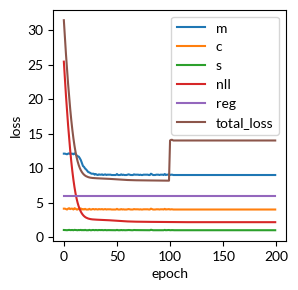

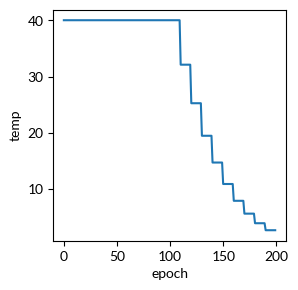

Time elapsed: 19.814785


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H132374_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

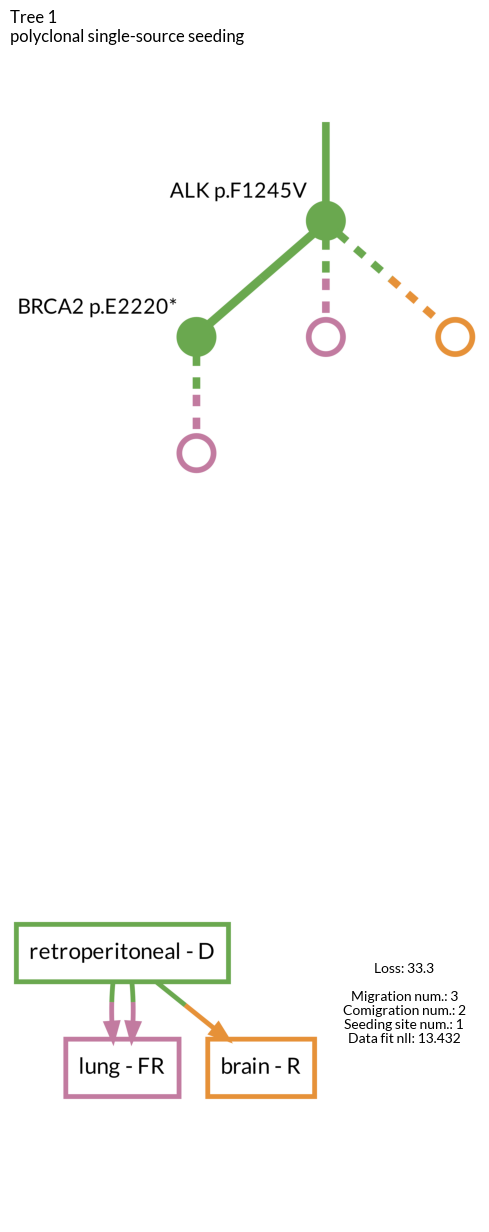

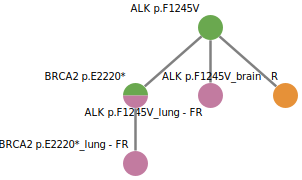

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H103207_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: left adrenal - D
TREE 0, llh -423.36556034406163
tensor([[0., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.]])
Anatomical sites: ['left adrenal - TR', 'brain, right frontal - R', 'brain, cerebellum - R', 'left lung lower lobe - FR', 'liver - FR', 'right lung lower lobe - FR', 'left adrenal - D']


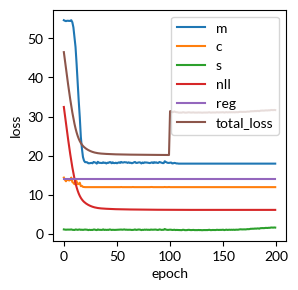

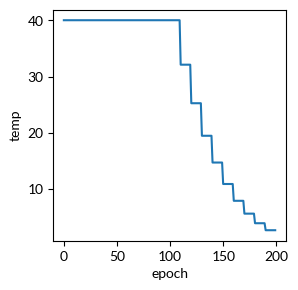

Time elapsed: 20.173139


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H103207_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

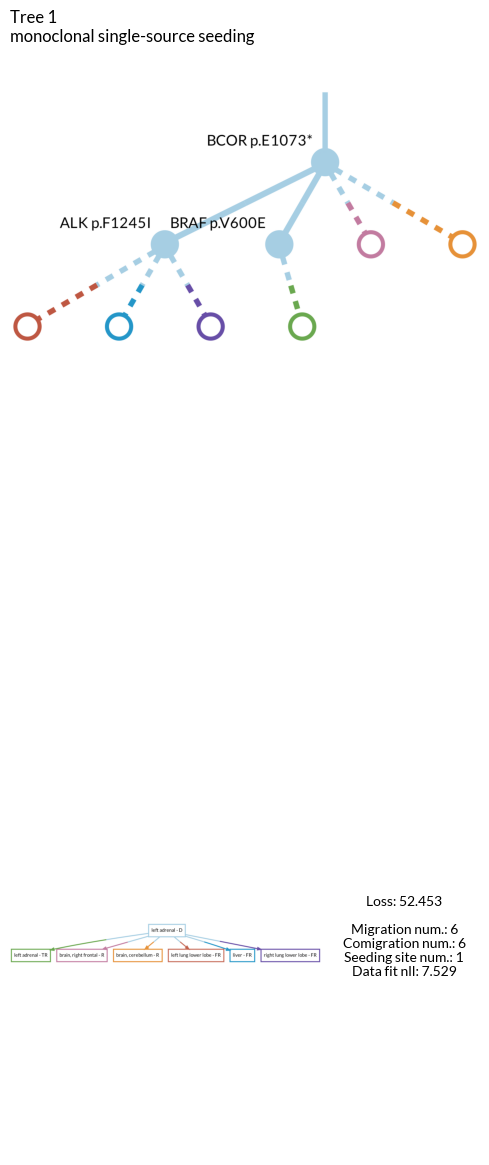

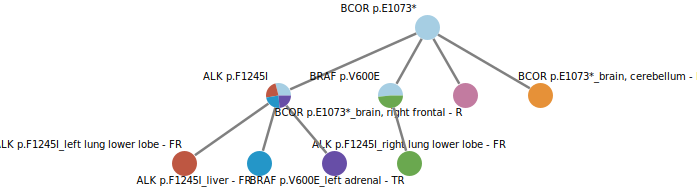

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H132387_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
*Multiple primary samples, running metient once for each possible primary*
Primary site: right pleural - D 0
TREE 0, llh -65.40989492455171
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['right pleural - D 0', 'right pleural - D 1', 'paraspinal at T8-T9 - R 2', 'cervical paraspinal at C3 - FR 3']


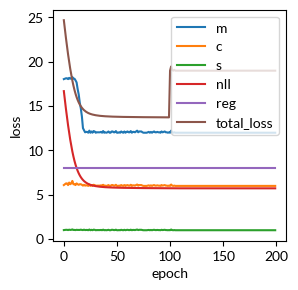

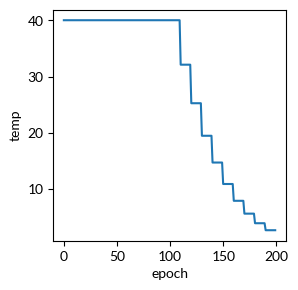

Time elapsed: 21.278521


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H132387_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

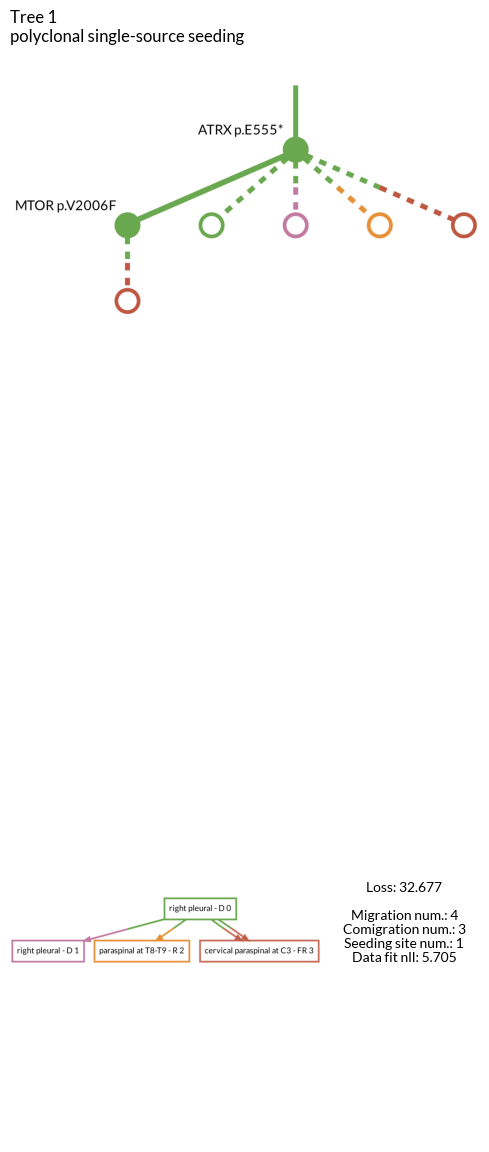

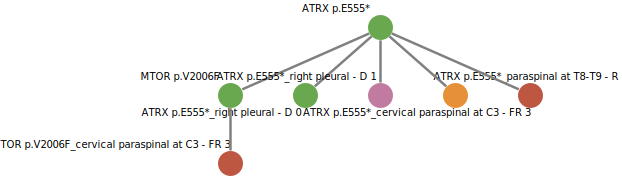

Primary site: right pleural - D 1
TREE 0, llh -65.40989492455171
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['right pleural - D 0', 'right pleural - D 1', 'paraspinal at T8-T9 - R 2', 'cervical paraspinal at C3 - FR 3']


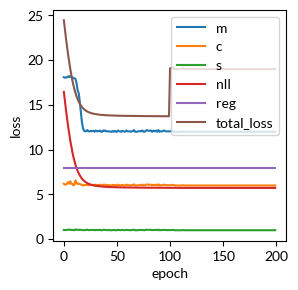

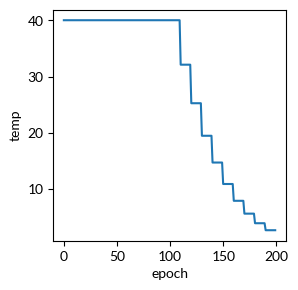

Time elapsed: 20.654451


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H132387_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

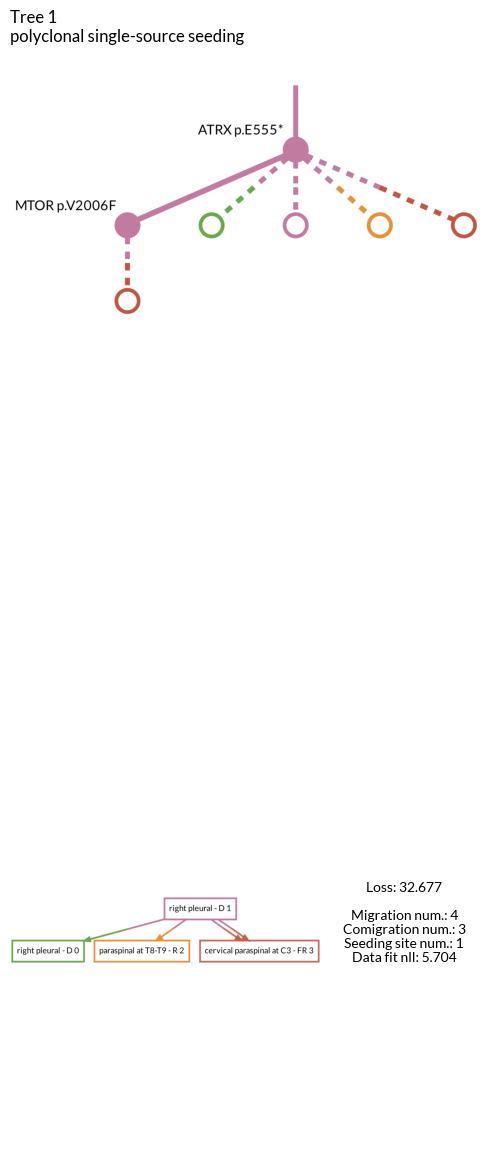

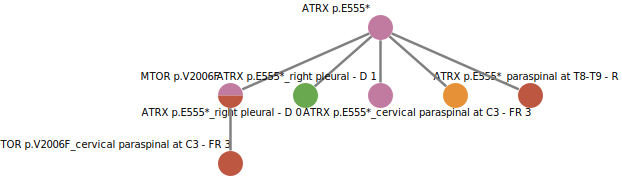

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H134819_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: aortic bifurcation - D 5
TREE 0, llh -22.060626100794988
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['pelvic - FR 0', 'common iliac artery - FR 1', 'pelvic - FR 2', 'pelvic - FR 3', 'pelvic - FR 4', 'aortic bifurcation - D 5']


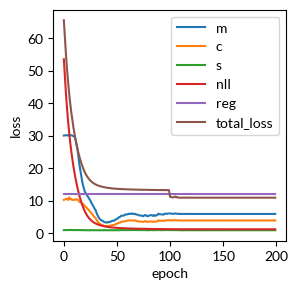

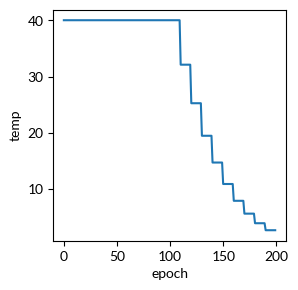

Time elapsed: 18.018072


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H134819_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

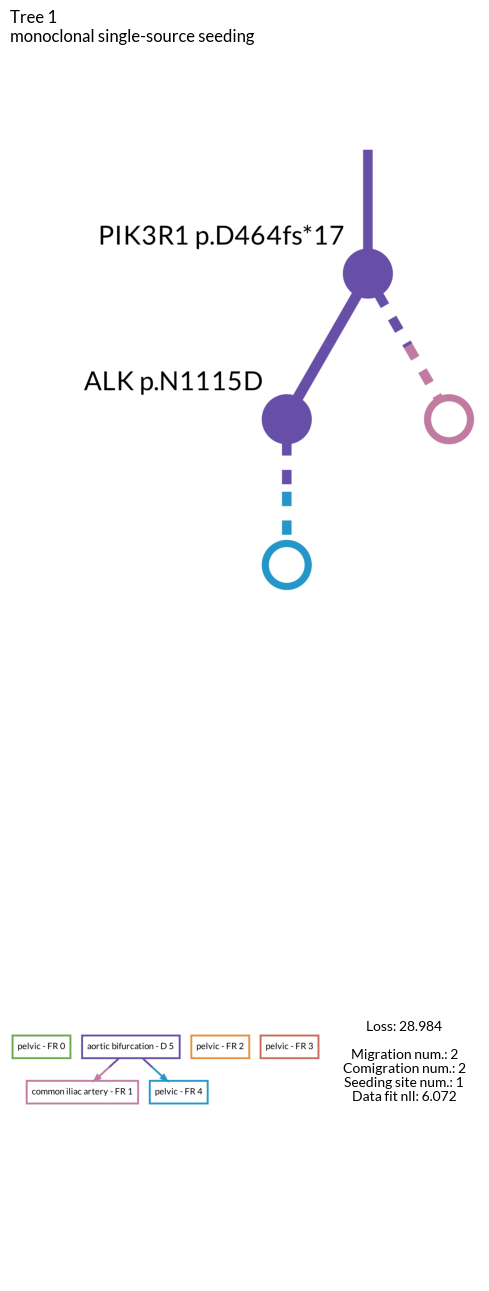

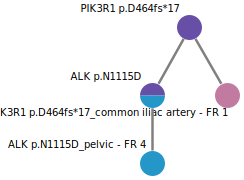

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H116984_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: left adrenal - D
TREE 0, llh -11.893827869535844
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['right inguinal lymph node - R', 'left adrenal - D']


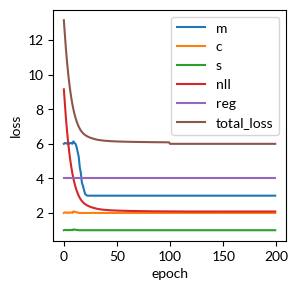

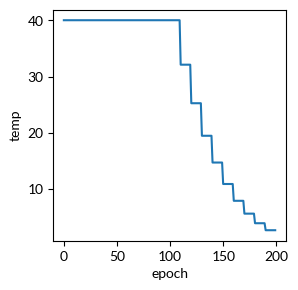

Time elapsed: 17.763511


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H116984_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

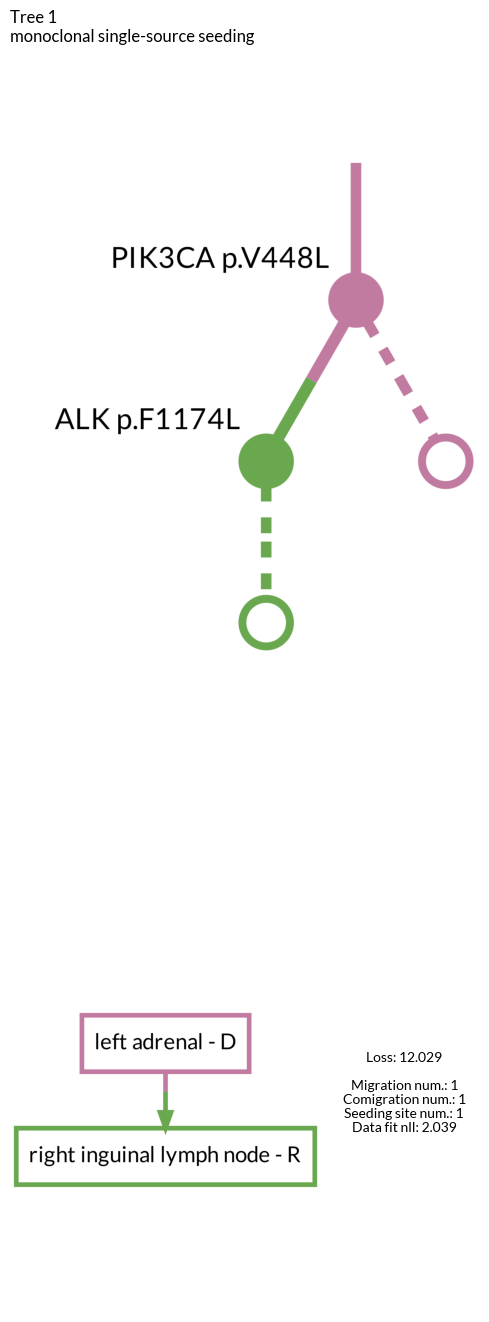

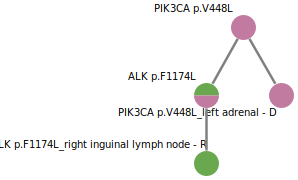

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H134821_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H116991_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: left adrenal - TR
TREE 0, llh -15.256058360514686
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['left adrenal - TR', 'portal lymph node - R', 'left kidney - FR']


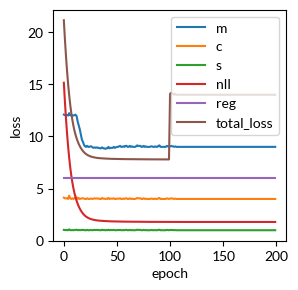

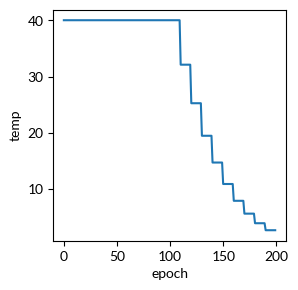

Time elapsed: 18.172173


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H116991_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

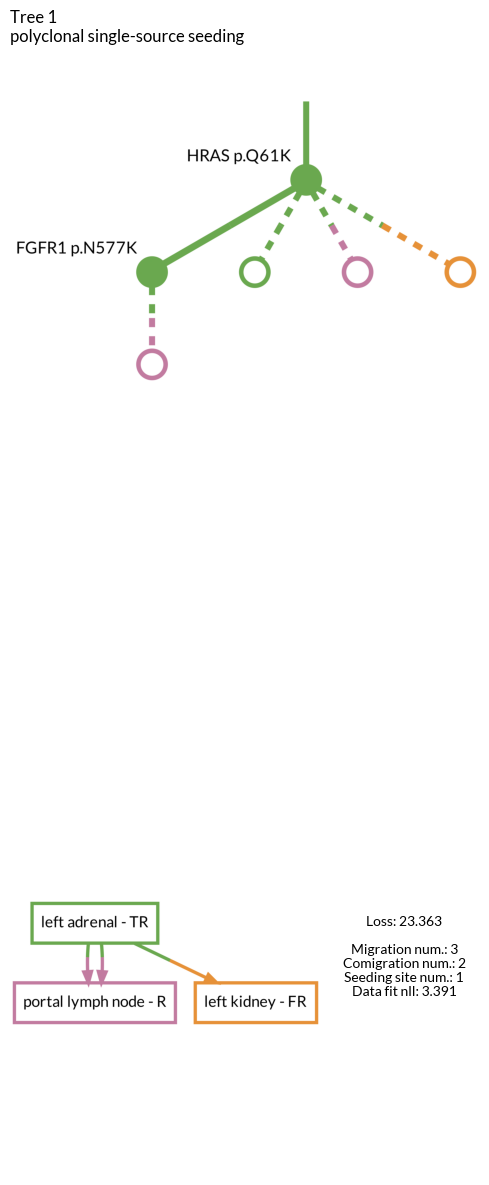

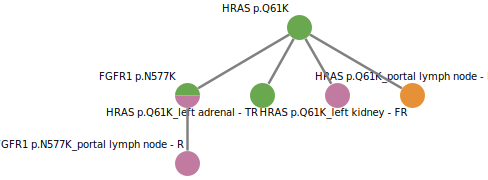

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H133121_clustered xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: right retroperitoneal - TR
TREE 0, llh -15.46168138508909
tensor([[0., 1.],
        [0., 0.]])
Anatomical sites: ['right retroperitoneal - TR', 'brain, parietal - R', 'brain, temporal - FR']


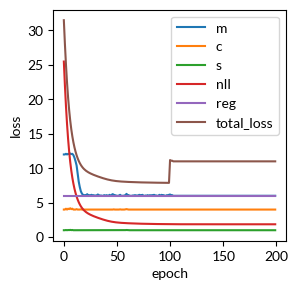

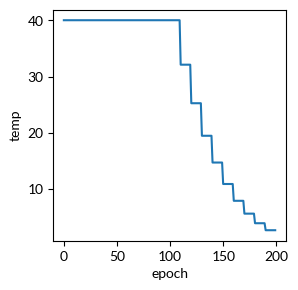

Time elapsed: 17.977499


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/plotting_util.py:740: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving H133121_clustered to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/gundem_neuroblastoma_2023/patient_driver_genes/metient_outputs


<Figure size 300x300 with 0 Axes>

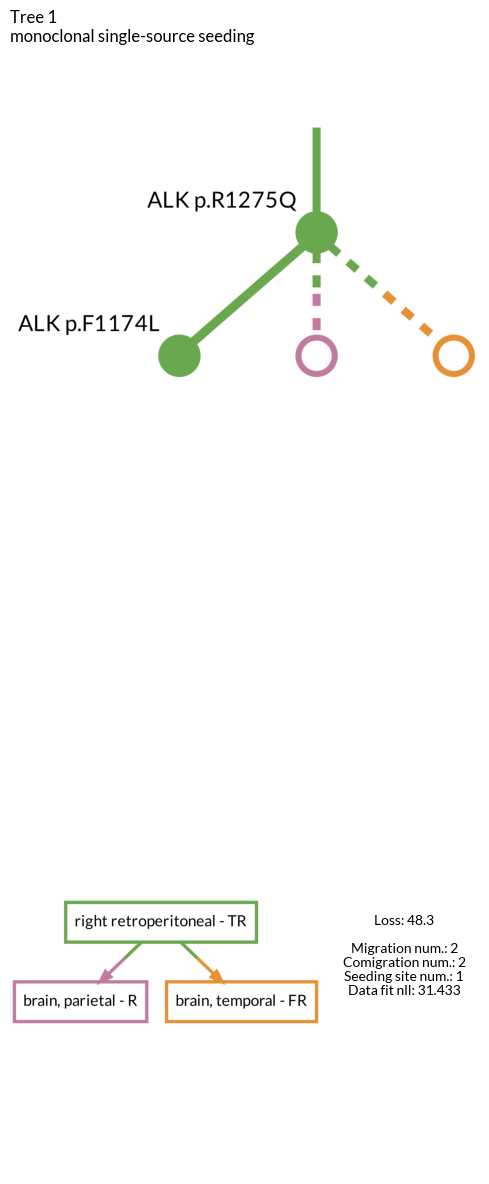

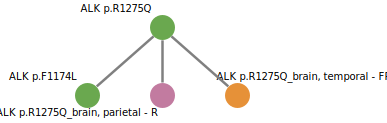

In [6]:
def run_patients(patients):
    for patient in patients:
        space = "x"*45
        tsv_fn = os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv")
        print(f"{space} PATIENT {patient} {space}")
        df = pd.read_csv(tsv_fn, delimiter="\t")
        primary_sites = list(df[df['tumor_type']=='primary_disease']['anatomical_site_label'].unique())
        if len(primary_sites) > 1:
            # Try to find one unique primary, diagnosis sample to use as primary
            primary_sites = list(df[(df['tumor_type']=='primary_disease') & (df['sample_type']=='diagnosis')]['anatomical_site_label'].unique())
            if (len(primary_sites) > 1):
                print("*Multiple primary samples, running metient once for each possible primary*")

        for primary_site in primary_sites:
            print(f"Primary site: {primary_site}")
            find_labeling(tsv_fn, os.path.join(ORCHARD_TREES_DIR, f"{patient}.results.npz"),
                         custom_colors, primary_site, patient)
patients = set()
for file in os.listdir(ORCHARD_TREES_DIR):
    if "_clustered.results.npz" in file:
        patients.add(file.split(".")[0])
print(f"{len(patients)} patients, {patients}")

run_patients(patients)

### WIP metastatic selection analysis

In [2]:
def metastatic_selection_analysis(ref_var_fn, primary):
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(unique_sites)
    df = pd.read_csv(ref_var_fn, delimiter="\t")
    vaf_matrix = var_matrix / (var_matrix + ref_matrix)
    purity = np.array(df[df['character_label']==list(cluster_label_to_idx.keys())[0]]['purity'])
    # TODO: get CN calls
    print("purity", purity)
    mult = 1.0 # assume number of chromosomal copies that carry the mutation is 1.0
    local_cn = 2.0 # assume local CN is 2 for now
    a = ((vaf_matrix.T/(mult*purity)))
    b = ((purity*local_cn) + (2.0*(1.0-purity)))
    ccf_matrix = (a*b).T.numpy()
    print(ccf_matrix)
    
    # 0 = absent, 1 = subclonal, 2 = clonal
    clonality_matrix = np.where(((ccf_matrix <= 0.5) & (ccf_matrix > 0.1)), 1, 0)
    clonality_matrix = np.where((ccf_matrix > 0.5), 2, clonality_matrix)
    clonality_data = []
    label_map = {0:"Absent", 1:"Subclonal", 2:"Clonal"}
    num_subclones = clonality_matrix.shape[1]
    for i in range(num_subclones):
        subclone_col = clonality_matrix[:,i]
        clonality_data.append([i]+[label_map[k] for k in subclone_col])
    
    primary_idx = unique_sites.index(primary)
    site_labels = [f"{site.capitalize()} Primary" if i==primary_idx else f"{site.capitalize()} Metastasis" for i, site in enumerate(unique_sites)]
    clonality_df = pd.DataFrame(clonality_data, columns=["Subclone"]+site_labels)
    print(clonality_df)
    
    # we call mutations with CCF>0.5 as clonal mutations, mutations with CCF<=0.5 and CCF>0.1 are subclonal
    # breast vs. liver
    from matplotlib import pyplot as plt
    import seaborn as sns
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
    y = f"{primary.capitalize()} Primary"

    c = 1
    for i in [0,1]:
        for j in [0,1,2]:
            if c == len(clonality_df.columns): break
            x = clonality_df.columns[c]
            print(x)

            ax = sns.swarmplot(ax=axes[i,j], data=clonality_df, x=x, y=y, 
                               order=["Absent", "Subclonal", "Clonal"], size=10, 
                               hue="Subclone")
            sns.despine(offset=0, trim=True)
            ax.set_xlabel(x, fontsize=11)
            ax.set_ylabel(y, fontsize=11)
            ax.get_legend().remove()
            # there is only one axes for this plot; provide an alias for ease of use
    #         ax.set_yticks(["Absent", "Subclonal", "Clonal"])
            # get the ytick locations for each name
            point_locs = []
            for path in ax.collections:
                point_locs.append(path.get_offsets())
                #print(path.get_label())

            point_locs = [list(item) for sublist in point_locs for item in sublist]
            c += 1
    fig.suptitle(f"Metastasizing Clones", x=0.33, y=0.95, horizontalalignment='left', verticalalignment='top', fontsize=14, fontweight='bold')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=num_subclones)
        # for i, point_loc in enumerate(point_locs):
        #     ax.text(point_loc[0], point_loc[1]+0.05, str(i))
        # for i in range(num_subclones):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)